In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import pandas as pd
import pymc3 as pm
import arviz as az
import importlib

import mint
importlib.reload(mint)
from mint import Mint, Coin

az.style.use('arviz-darkgrid')
%matplotlib inline

In [10]:
coins_per_mint = 3
mint = Mint(0.3, 0.05)
coins = mint.make_coins(coins_per_mint)

mint = Mint(0.7, 0.05)
mint.make_coins(coins_per_mint, coins)

In [11]:
flips = []
for ctr in range(1000):
  for coin in coins:
    coin.flip(flips)

In [12]:
df = pd.DataFrame(flips, columns=['mint_id', 'coin_id', 'flip'])
df.head()

,mint_id,coin_id,flip
0,0,0,0
1,0,1,1
2,0,2,1
3,1,3,0
4,1,4,0


In [13]:
flips = df['flip'].values
idx = df['mint_id'].values
groups = len(np.unique(idx))

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [θ]
Sampling 4 chains, 0 divergences: 100%|██████████| 10000/10000 [00:05<00:00, 1952.12draws/s]
The acceptance probability does not match the target. It is 0.8787797216691124, but should be close to 0.8. Try to increase the number of tuning steps.


       mean     sd  hpd_3%  hpd_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
θ[0]  0.320  0.009   0.303    0.335        0.0      0.0    7419.0  7419.0   
θ[1]  0.679  0.008   0.663    0.695        0.0      0.0    7043.0  7043.0   

      ess_bulk  ess_tail  r_hat  
θ[0]    7420.0    5409.0    1.0  
θ[1]    7035.0    5782.0    1.0  


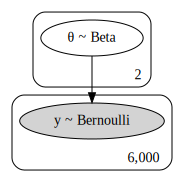

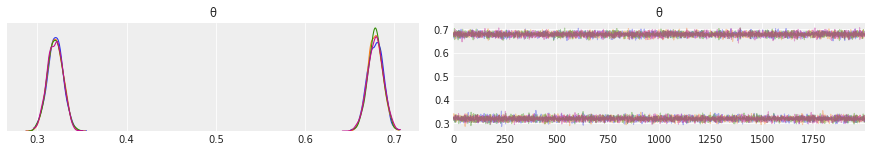

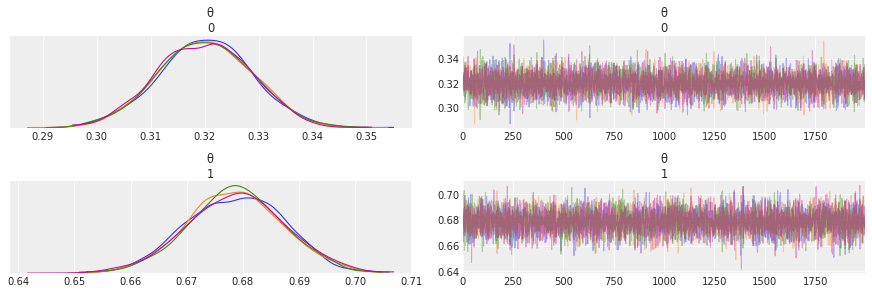

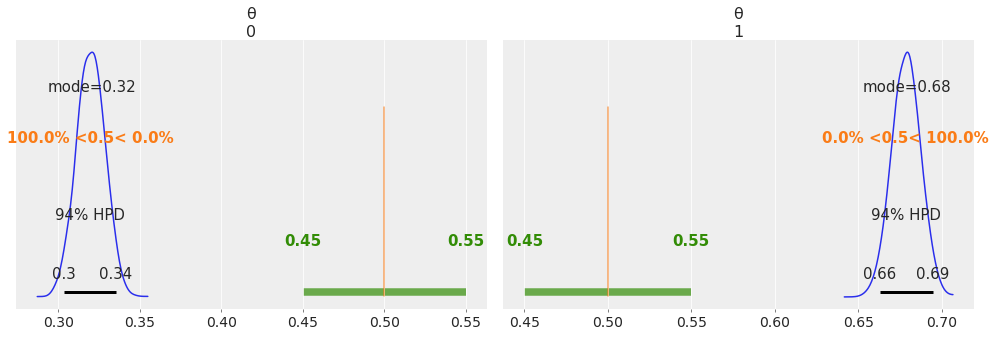

In [14]:
with pm.Model() as model:
  # uniform prior
  θ = pm.Beta('θ', alpha=1., beta=1., shape=groups)
  # likelihood p(y|θ)
  y = pm.Bernoulli('y', p=θ[idx], observed=df['flip'])
  trace = pm.sample(2000, random_seed=123)
  print(az.summary(trace))
  pm.traceplot(trace)
  az.plot_trace(trace)
  az.plot_posterior(trace, rope=[0.45, 0.55], ref_val=0.5, point_estimate='mode')

pm.model_to_graphviz(model)